# <u>Introducción a los Sistemas de Recomendación</u>

## Librerías

In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156238 sha256=618db90985384e928fcbc4e46f5dc51aa4453afd6ed242bf25fff0fc6378f6c2
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
import surprise

## Dataset

Vamos a utilizar el conjunto de datos MovieLens: https://grouplens.org/datasets/movielens/100k/

In [4]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [5]:
ratings = pd.read_csv('ratings.csv')
ratings.head(20)

,user,movie,rating,movie name
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)
5,298,474,4,Dr. Strangelove or: How I Learned to Stop Worr...
6,115,265,2,"Hunt for Red October, The (1990)"
7,253,465,5,"Jungle Book, The (1994)"
8,305,451,3,Grease (1978)
9,6,86,3,"Remains of the Day, The (1993)"


In [6]:
ratings.shape

(100000, 4)

In [7]:
ratings['user'].nunique()

943

In [8]:
ratings['movie'].nunique()

1682

In [9]:
ratings['user'].nunique() * ratings['movie'].nunique()

1586126

### Ratings de un usuario

In [10]:
ratings.head(1)

,user,movie,rating,movie name
0,196,242,3,Kolya (1996)


In [11]:
ratings[ratings['user'] == 196]

,user,movie,rating,movie name
0,196,242,3,Kolya (1996)
940,196,393,4,Mrs. Doubtfire (1993)
1133,196,381,4,Muriel's Wedding (1994)
1812,196,251,3,Shall We Dance? (1996)
1896,196,655,5,Stand by Me (1986)
2374,196,67,5,Ace Ventura: Pet Detective (1994)
6910,196,306,4,"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)"
7517,196,238,4,Raising Arizona (1987)
7842,196,663,5,Being There (1979)
10017,196,111,4,"Truth About Cats & Dogs, The (1996)"


### Distribución de ratings

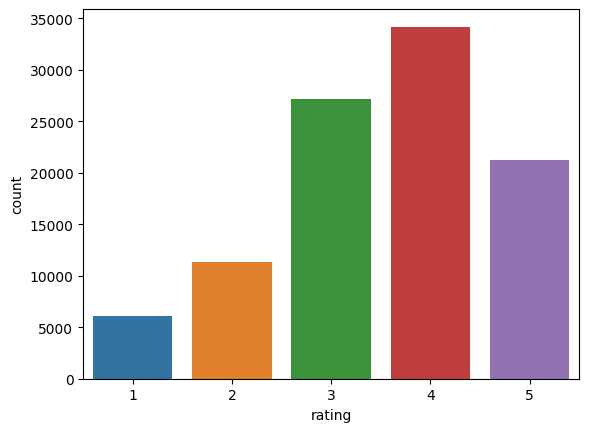

In [12]:
sns.countplot(data = ratings, x = 'rating')
plt.show()

## Vecinos más cercanos

Vamos a darle el formato de la librería a la data que tenemos

In [13]:
from surprise import Dataset, Reader

In [14]:
reader = Reader(line_format='user item rating')

In [15]:
ratings[['user', 'movie', 'rating']].head()

,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [16]:
surprise_dataset = Dataset.load_from_df(ratings[['user', 'movie', 'rating']], reader)

### Dividimos la data en entrenamiento y prueba

In [17]:
import sklearn

In [18]:
from surprise.model_selection import train_test_split

In [19]:
trainset, testset = train_test_split(surprise_dataset, test_size=.25)

In [20]:
from surprise import KNNBasic

In [21]:
knn = KNNBasic(k = 11)

In [22]:
knn.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [23]:
predictions = knn.test(testset)

In [24]:
df_predictions = pd.DataFrame(predictions)

In [25]:
df_predictions.head(30)

,uid,iid,r_ui,est,details
0,14,195,5.0,4.328996,"{'actual_k': 11, 'was_impossible': False}"
1,210,79,4.0,4.377023,"{'actual_k': 11, 'was_impossible': False}"
2,940,628,4.0,3.460397,"{'actual_k': 11, 'was_impossible': False}"
3,937,408,5.0,4.764569,"{'actual_k': 11, 'was_impossible': False}"
4,527,214,4.0,3.646732,"{'actual_k': 11, 'was_impossible': False}"
5,169,684,5.0,3.616790,"{'actual_k': 11, 'was_impossible': False}"
6,256,1051,4.0,3.546633,"{'actual_k': 11, 'was_impossible': False}"
7,216,237,5.0,3.926264,"{'actual_k': 11, 'was_impossible': False}"
8,393,412,3.0,2.458996,"{'actual_k': 11, 'was_impossible': False}"
9,807,739,4.0,3.902179,"{'actual_k': 11, 'was_impossible': False}"


In [26]:
from surprise import accuracy

In [27]:
accuracy.rmse(predictions)

RMSE: 0.9934


0.9933985675837892

### Más ejemplos:

https://towardsdatascience.com/how-you-can-build-simple-recommender-systems-with-surprise-b0d32a8e4802

https://towardsdatascience.com/how-to-build-a-memory-based-recommendation-system-using-python-surprise-55f3257b2cf4